# **Loan Approval Analysis**

## 1. Introduction 

In this project, the database will be analysed with the objective to answer which factors are relevant when individuals are requesting a loan. 

#### a. Is gender/age/education/ownership a factor to take into account at the time to request a loan? 
#### b. Has the interest rate any relevance in this? 
#### c. Which loan intent has the highest failure rate?
#### d. What is the connection between the person income and loan amount vs loan approval? 



### Data import

In [4]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import math

data = pd.read_csv('loan_data.csv')

### Data inspection 

#### Columns

In [6]:
print(data.columns)

Index(['person_age', 'person_gender', 'person_education', 'person_income',
       'person_emp_exp', 'person_home_ownership', 'loan_amnt', 'loan_intent',
       'loan_int_rate', 'loan_percent_income', 'cb_person_cred_hist_length',
       'credit_score', 'previous_loan_defaults_on_file', 'loan_status'],
      dtype='object')


#### Data info

In [8]:
print(data.info())

#print(data.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45000 entries, 0 to 44999
Data columns (total 14 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   person_age                      45000 non-null  float64
 1   person_gender                   45000 non-null  object 
 2   person_education                45000 non-null  object 
 3   person_income                   45000 non-null  float64
 4   person_emp_exp                  45000 non-null  int64  
 5   person_home_ownership           45000 non-null  object 
 6   loan_amnt                       45000 non-null  float64
 7   loan_intent                     45000 non-null  object 
 8   loan_int_rate                   45000 non-null  float64
 9   loan_percent_income             45000 non-null  float64
 10  cb_person_cred_hist_length      45000 non-null  float64
 11  credit_score                    45000 non-null  int64  
 12  previous_loan_defaults_on_file  

## 2. EDA (exploratory analysis)

#### Pie chart for approvals/denies & Bar plot for loan status distribution 

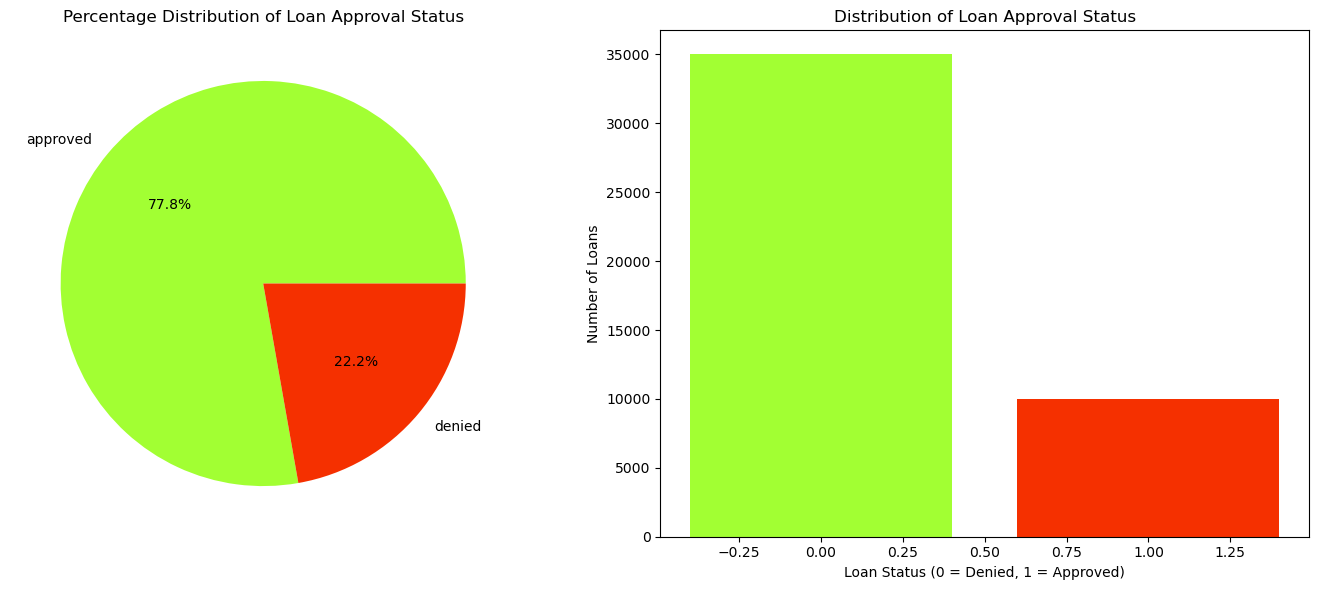

In [11]:
status_counts = data['loan_status'].value_counts()

fig, axes = plt.subplots(1, 2, figsize=(14, 6))

axes[0].pie(status_counts,labels = ['approved', 'denied'],colors = ['#A2FF33', '#F53000'],autopct='%1.1f%%')
axes[0].set_title('Percentage Distribution of Loan Approval Status')

axes[1].bar(status_counts.index,status_counts.values,color = ['#A2FF33','#F53000'])
axes[1].set_title('Distribution of Loan Approval Status')
axes[1].set_xlabel('Loan Status (0 = Denied, 1 = Approved)')
axes[1].set_ylabel('Number of Loans')

plt.tight_layout()  #q graficos no se superpongan
plt.show()

#### According to the graphs given by the data, 78% of all the loans applications are accepted while the other 22% are rejected. Giving an approximate of 4 to 1 ratio. 

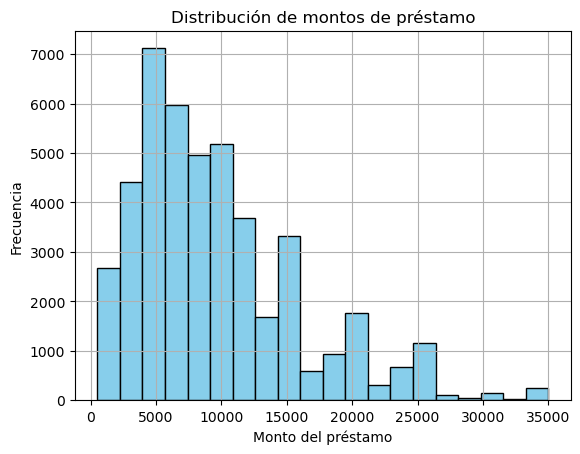

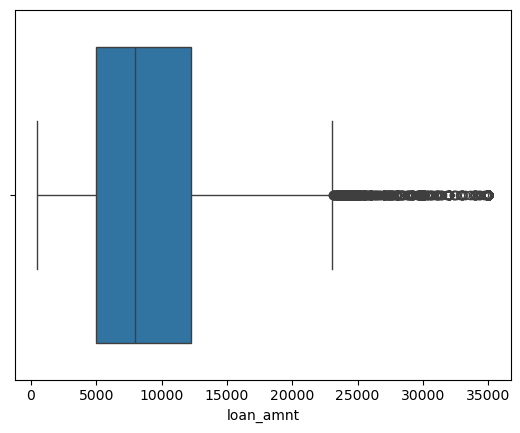

count    45000.000000
mean      9583.157556
std       6314.886691
min        500.000000
25%       5000.000000
50%       8000.000000
75%      12237.250000
max      35000.000000
Name: loan_amnt, dtype: float64


In [5]:

# Histograma para variables numéricas
data['loan_amnt'].hist(bins=20, color='skyblue', edgecolor='black')
plt.title('Distribución de montos de préstamo')
plt.xlabel('Monto del préstamo')
plt.ylabel('Frecuencia')
plt.show()

# Boxplot para ver la dispersión y posibles valores atípicos

sns.boxplot(x=data['loan_amnt'])
plt.show()

print(data['loan_amnt'].describe())

### Frequency analysis for numeric columns 

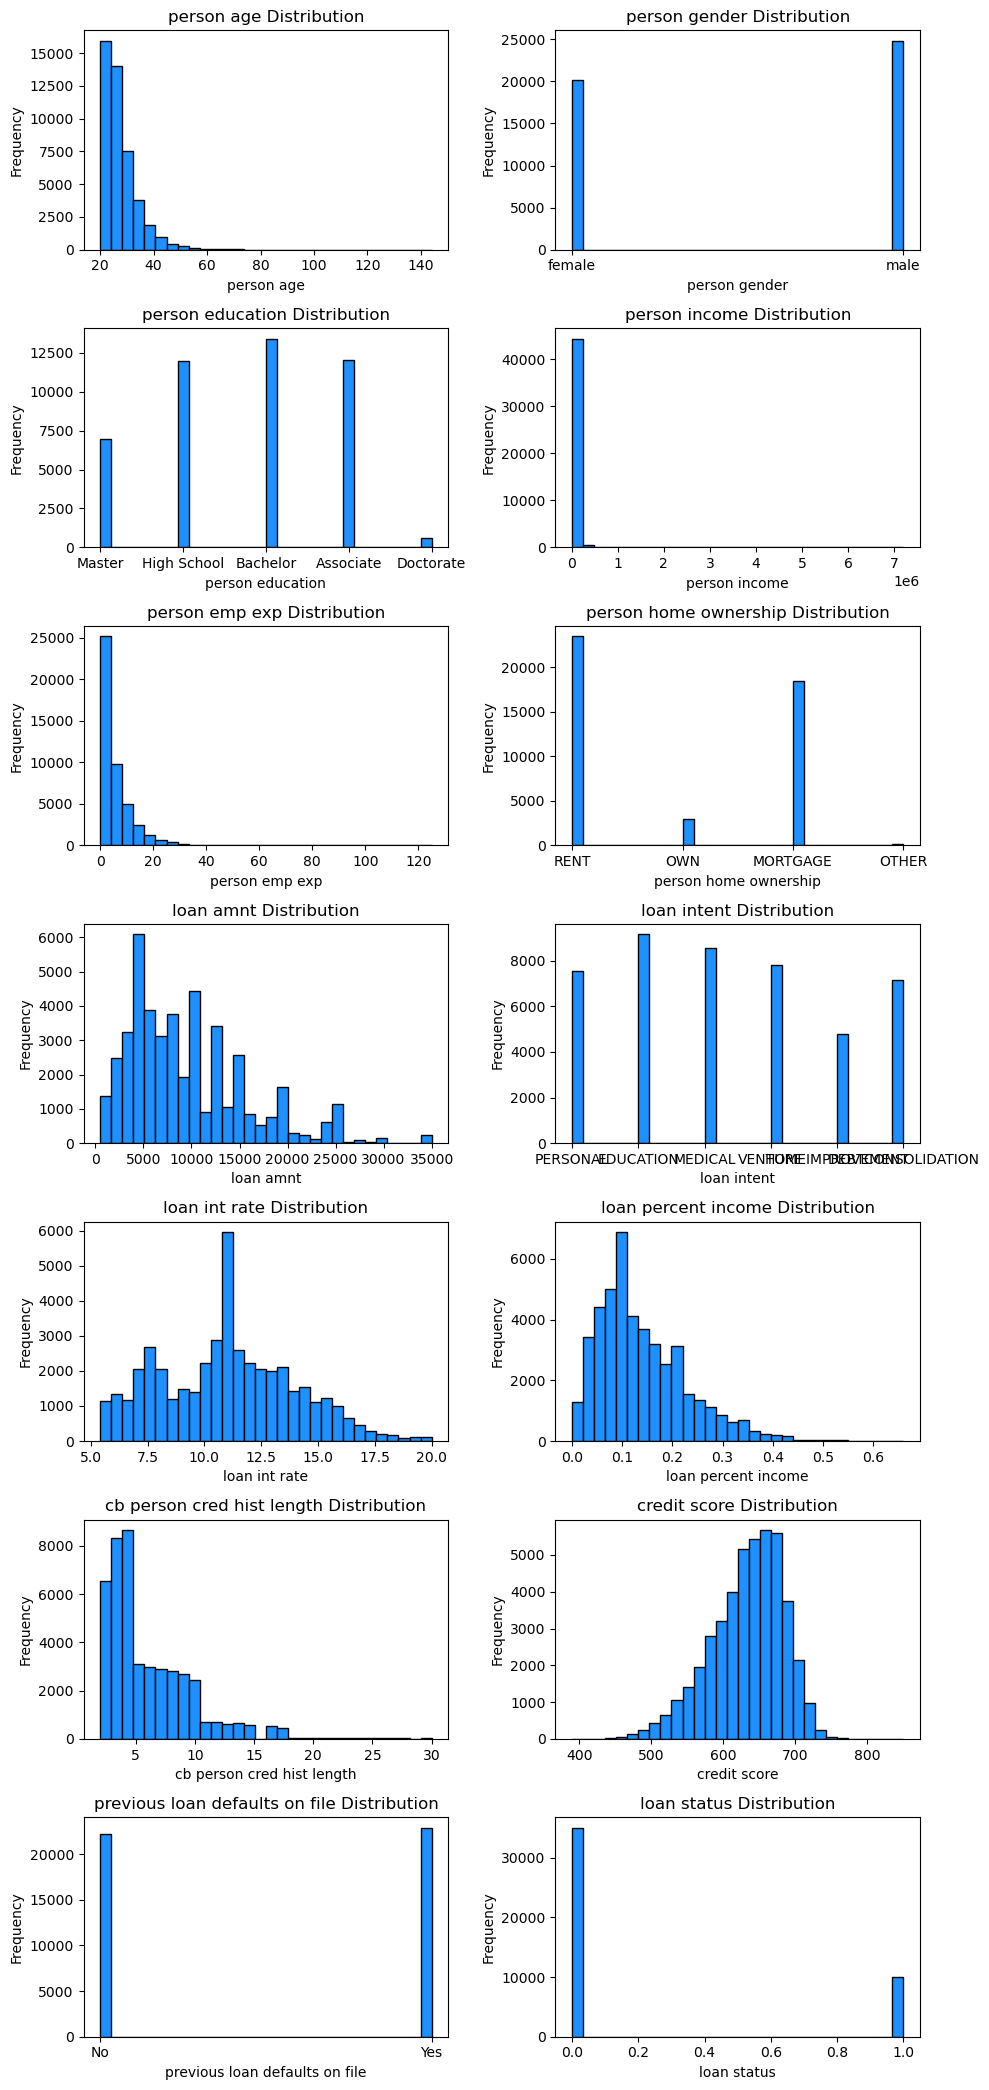

count    45000.000000
mean      9583.157556
std       6314.886691
min        500.000000
25%       5000.000000
50%       8000.000000
75%      12237.250000
max      35000.000000
Name: loan_amnt, dtype: float64


In [10]:
n_columns = len(data.columns) 
n_rows = math.ceil(n_columns / 2)  # Calcula dinámicamente las filas necesarias (2 subplots por fila)

fig, axes = plt.subplots(n_rows, 2, figsize=(10, 3 * n_rows))
axes = axes.flatten()  

for i, column in enumerate(data.columns):
    ax = axes[i]  # Accede al subplot correspondiente
    ax.hist(data[column], bins=30, color='dodgerblue', edgecolor='black')
    ax.set_title(f'{column.replace("_", " ")} Distribution')
    ax.set_xlabel(column.replace('_', ' '))
    ax.set_ylabel('Frequency')

for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

print(data['loan_amnt'].describe())

### Conclusions based on the Frequency diagrams:

#### Person Age column values are mostly concentrated in the ~20 to ~30 years old.
#### Person gender shows a % 25 difference between Male and Female with Males on top.
#### Person Education shows a that most of loans requests are made by people with a Bachelors degree, closely followed by High School and Associate. 
#### Person work experience is heavily concentred in the 0 to 5 years. With an average of 5.4 years of experience. 
#### Loan Amount is mostly concentrated on the in the lower-part of the spectrum with an average of $ 9583.15 deviation to the higher part of the spectrum with and standart deviation of 6314.



### Box plot Analysis

Text(0.5, 0, 'Person age')

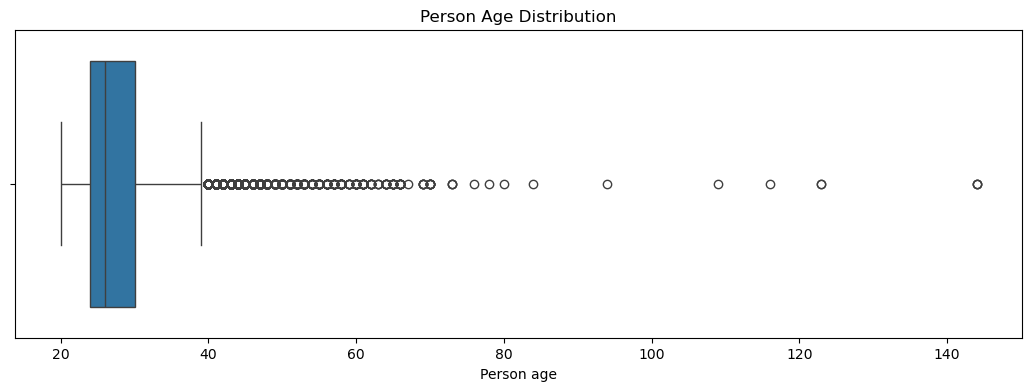

In [17]:
plt.figure(figsize=(13, 4))
sns.boxplot(x=data['person_age'])
plt.title('Person Age Distribution')
plt.xlabel('Person age')

Text(0.5, 0, 'income')

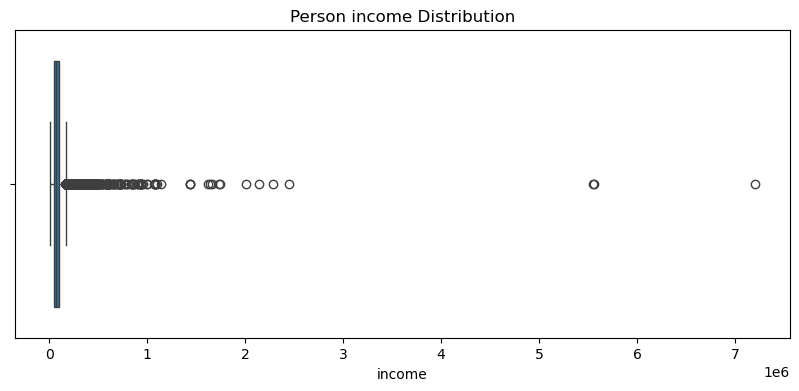

In [18]:
plt.figure(figsize = (10,4))
sns.boxplot(x=data['person_income'])
plt.title('Person income Distribution')
plt.xlabel('income')
         

Text(0.5, 0, 'Loan amount')

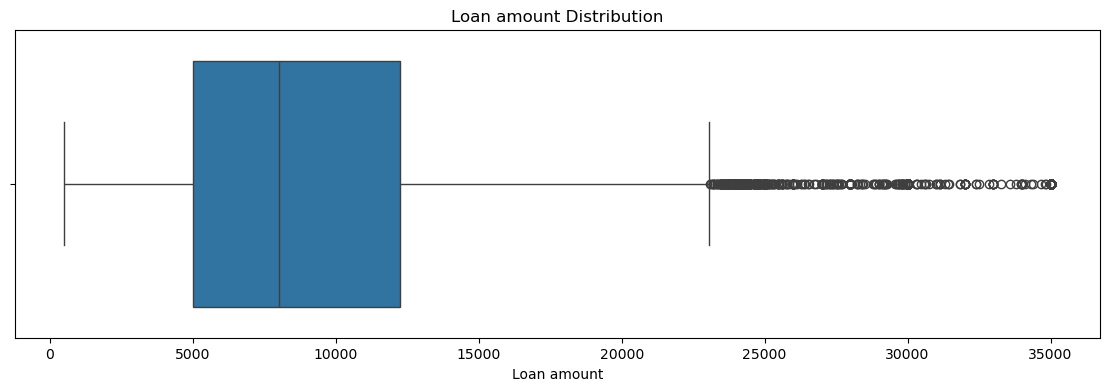

In [19]:
plt.figure(figsize= (14,4))
sns.boxplot(x=data['loan_amnt'])
plt.title('Loan amount Distribution')
plt.xlabel('Loan amount')

Text(0.5, 0, 'loan amount')

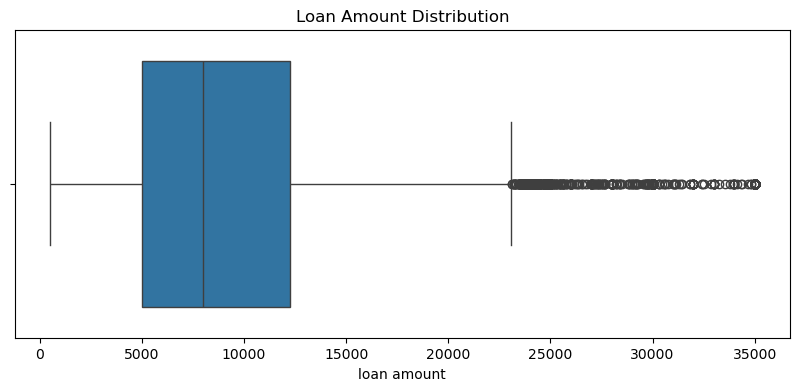

In [20]:
plt.figure(figsize = (10,4))
sns.boxplot(x=data['loan_amnt'])
plt.title('Loan Amount Distribution')
plt.xlabel('loan amount')

Text(0.5, 0, 'Loan percentage income')

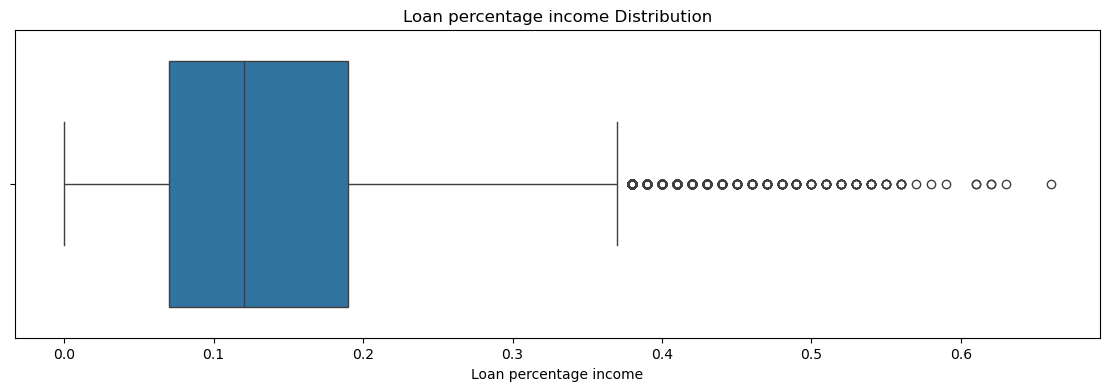

In [21]:
plt.figure(figsize= (14,4))
sns.boxplot(x=data['loan_percent_income'])
plt.title('Loan percentage income Distribution')
plt.xlabel('Loan percentage income')

Text(0.5, 0, 'Loan percentage income')

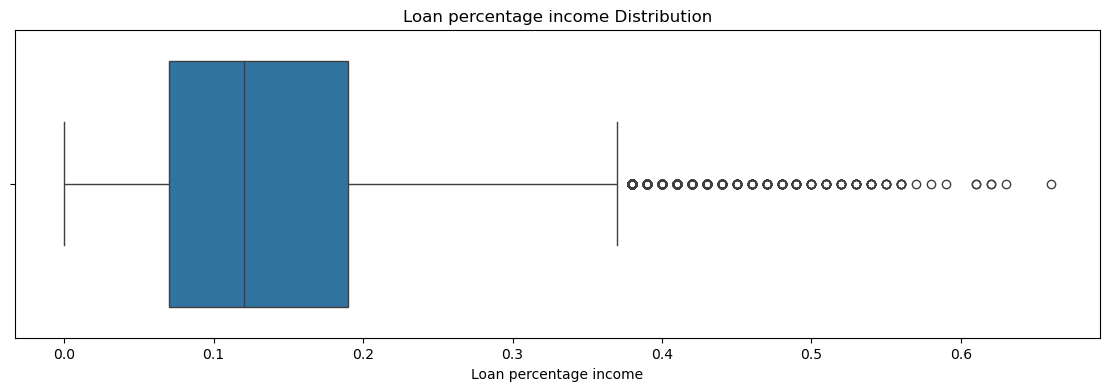

In [22]:
plt.figure(figsize= (14,4))
sns.boxplot(x=data['loan_percent_income'])
plt.title('Loan percentage income Distribution')
plt.xlabel('Loan percentage income')

Text(0.5, 1.0, 'Credit Score Distribution')

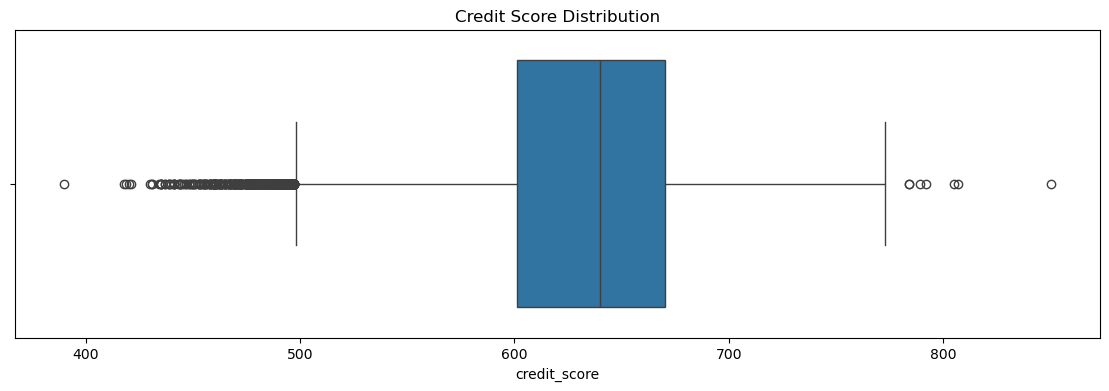

In [23]:
plt.figure(figsize=(14,4))
sns.boxplot(x=data['credit_score'])
plt.title('Credit Score Distribution') 

Text(0.5, 1.0, 'Credit Score hist Distribution')

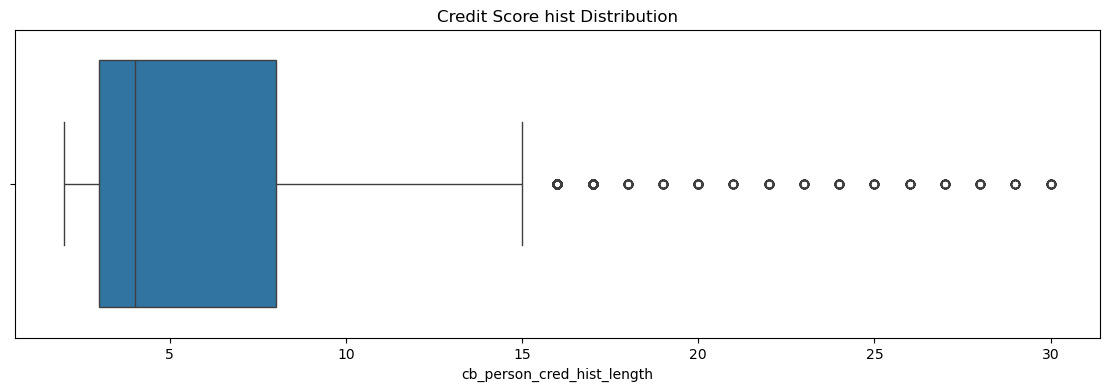

In [24]:
plt.figure(figsize=(14,4))
sns.boxplot(x=data['cb_person_cred_hist_length'])
plt.title('Credit Score hist Distribution')


### Insights based on boxplot analysis: 

## 3. Answerting 
Once done that, lets explore the questions marked at the beginning of the project 
### a. Is gender/age/education a factor to take into account at the time to request a loan?

#### a.0 Gender

loan_status            0          1
person_gender                      
female         77.751873  22.248127
male           77.798800  22.201200


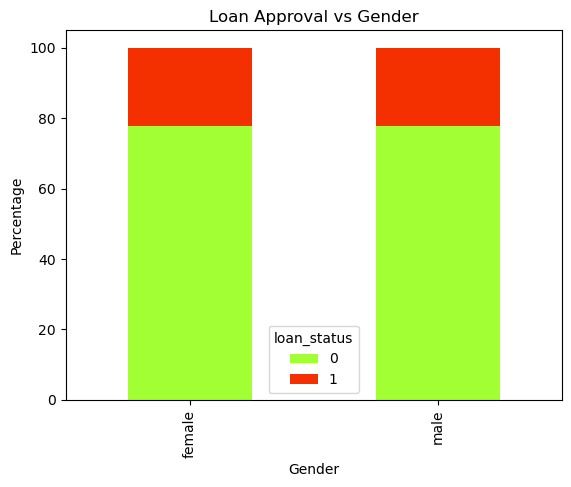

In [27]:
# Tabla cruzada de género y estado del préstamo
gender_loan_status = pd.crosstab(data['person_gender'], data['loan_status'], normalize='index') * 100
print(gender_loan_status)

gender_loan_status.plot(kind='bar', stacked=True, color=['#A2FF33', '#F53000'])
plt.title('Loan Approval vs Gender')
plt.ylabel('Percentage')
plt.xlabel('Gender')
plt.show()


#### a.1 Age

loan_status           0          1
age_group                         
18-25         76.440316  23.559684
26-35         78.456158  21.543842
36-45         79.102795  20.897205
46-55         77.513966  22.486034
56-65         71.969697  28.030303
66-75         78.378378  21.621622
75+          100.000000   0.000000


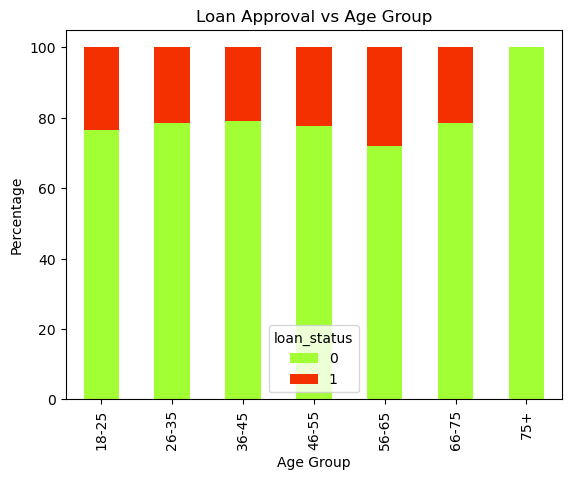

In [29]:
# Crear rangos de edad
bins = [18, 25, 35, 45, 55, 65, 75, 100]  # Límites para los grupos de edad
labels = ['18-25', '26-35', '36-45', '46-55', '56-65', '66-75', '75+']

# Crear la nueva columna de grupos de edad
data['age_group'] = pd.cut(data['person_age'], bins=bins, labels=labels, right=False)

# Tabla cruzada para calcular porcentajes de aprobación/rechazo por grupo de edad
age_loan_status = pd.crosstab(data['age_group'], data['loan_status'], normalize='index') * 100
print(age_loan_status)

# Visualizar con gráfico de barras apiladas
age_loan_status.plot(kind='bar', stacked=True, color=['#A2FF33', '#F53000'])
plt.title('Loan Approval vs Age Group')
plt.ylabel('Percentage')
plt.xlabel('Age Group')
plt.show()


#### a.2 Education

loan_status               0          1
person_education                      
Associate         77.968074  22.031926
Bachelor          77.475931  22.524069
Doctorate         77.133655  22.866345
High School       77.689609  22.310391
Master            78.237822  21.762178


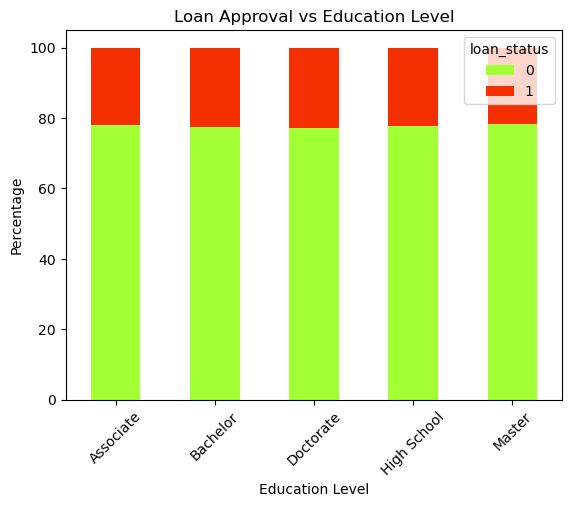

In [31]:
# Crear tabla cruzada para calcular porcentajes de aprobación/rechazo por nivel educativo
education_loan_status = pd.crosstab(data['person_education'], data['loan_status'], normalize='index') * 100
print(education_loan_status)

# Visualizar con gráfico de barras apiladas
education_loan_status.plot(kind='bar', stacked=True, color=['#A2FF33', '#F53000'])
plt.title('Loan Approval vs Education Level')
plt.ylabel('Percentage')
plt.xlabel('Education Level')
plt.xticks(rotation=45)  # Rotar etiquetas si es necesario
plt.show()


#### a.3 ownership 

loan_status                    0          1
person_home_ownership                      
MORTGAGE               88.403916  11.596084
OTHER                  66.666667  33.333333
OWN                    92.477126   7.522874
RENT                   67.602269  32.397731


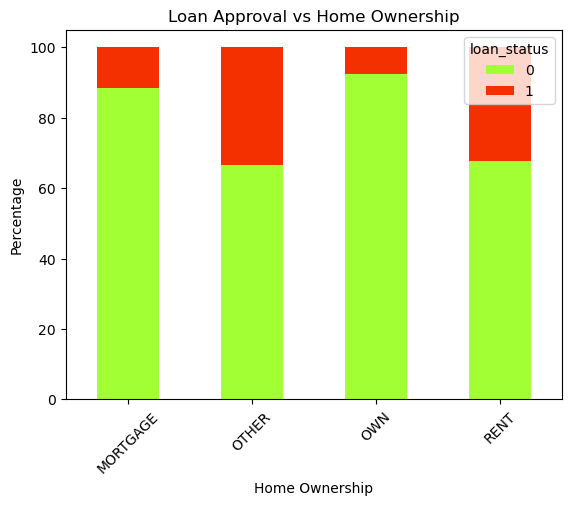

In [33]:
# Crear tabla cruzada para calcular porcentajes de aprobación/rechazo por tipo de propiedad de vivienda
ownership_loan_status = pd.crosstab(data['person_home_ownership'], data['loan_status'], normalize='index') * 100
print(ownership_loan_status)

# Visualizar con gráfico de barras apiladas
ownership_loan_status.plot(kind='bar', stacked=True, color=['#A2FF33', '#F53000'])
plt.title('Loan Approval vs Home Ownership')
plt.ylabel('Percentage')
plt.xlabel('Home Ownership')
plt.xticks(rotation=45)  # Rotar etiquetas si es necesario
plt.show()


In [34]:
#CONSLUSIONES DEL ITEM 1

### b. Has the interest rate any relevance in this? 

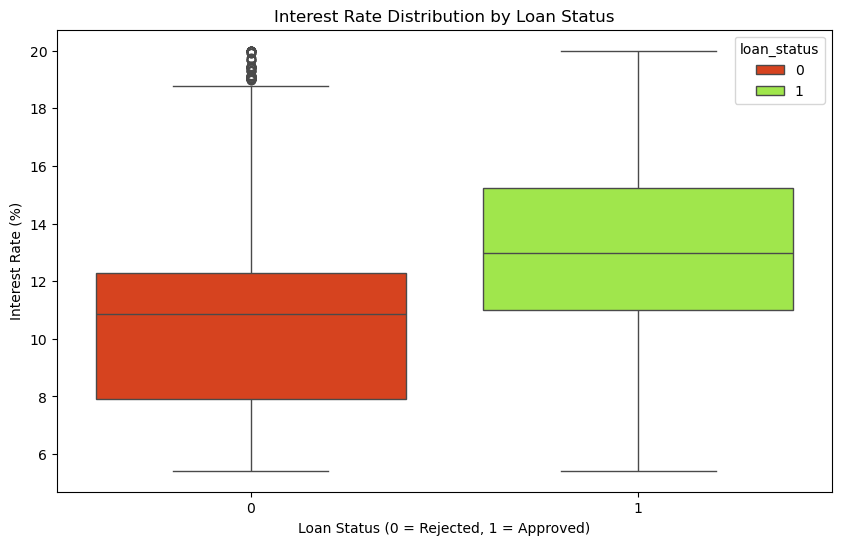

In [36]:
# Crear un boxplot para comparar la distribución de tasas de interés por estado del préstamo
plt.figure(figsize=(10, 6))
sns.boxplot(x='loan_status', y='loan_int_rate', data=data, hue='loan_status', palette={0: '#F53000', 1: '#A2FF33'})
plt.title('Interest Rate Distribution by Loan Status')
plt.xlabel('Loan Status (0 = Rejected, 1 = Approved)')
plt.ylabel('Interest Rate (%)')
plt.show()



In [37]:
# Promedio de tasa de interés por estado del préstamo
interest_by_status = data.groupby('loan_status')['loan_int_rate'].mean()
print(interest_by_status)


loan_status
0    10.477981
1    12.856794
Name: loan_int_rate, dtype: float64


### c. Which loan intent has the highest failure rate?


loan_intent
DEBTCONSOLIDATION    69.727082
MEDICAL              72.180627
HOMEIMPROVEMENT      73.698516
PERSONAL             79.859640
EDUCATION            83.043811
VENTURE              85.573603
Name: loan_status, dtype: float64


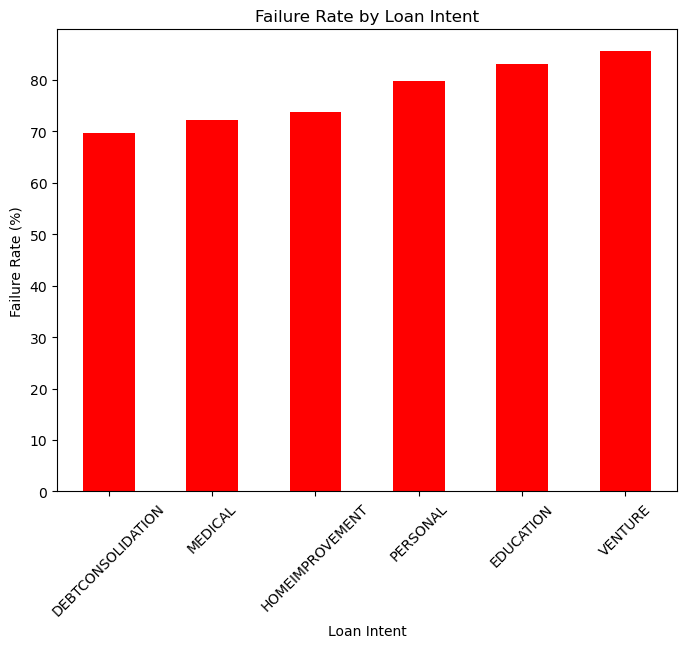

In [39]:

loan_intent_totals = data.groupby('loan_intent')['loan_status'].count()

# Calcular total de rechazos por intención
loan_intent_rejected = data[data['loan_status'] == 0].groupby('loan_intent')['loan_status'].count()

# Calcular la tasa de fracaso (rechazos / total)
failure_rate = (loan_intent_rejected / loan_intent_totals) * 100

# Ordenar de mayor a menor tasa de fracaso
failure_rate = failure_rate.sort_values(ascending=True)

print(failure_rate)

failure_rate.plot(kind='bar', color='red', figsize=(8, 6))
plt.title('Failure Rate by Loan Intent')
plt.ylabel('Failure Rate (%)')
plt.xlabel('Loan Intent')
plt.xticks(rotation=45)
plt.show()

    

### d. What is the conection between the person income and loan amount vs loan approval? 

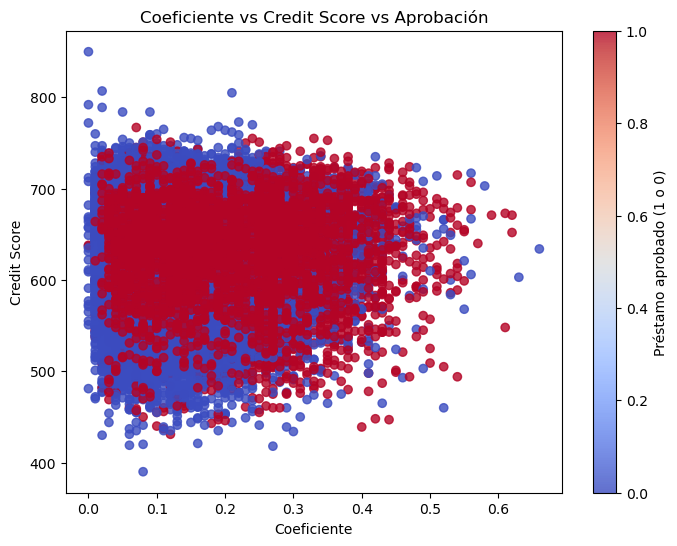

In [7]:
plt.figure(figsize=(8, 6))
scatter = plt.scatter(data['loan_percent_income'], data['credit_score'], c=data['loan_status'], cmap='coolwarm', alpha=0.8)
plt.colorbar(scatter, label='Préstamo aprobado (1 o 0)')
plt.xlabel('Loan Percent Income')
plt.ylabel('Credit Score')
plt.title('Loan Percent Income vs Credit Score vs Approval')
plt.show()
